# 1. Load libraries

In [1]:
import numpy as np
from datetime import datetime as dt
import os
from calculations import get_metric_f1 as f1
from calculations import put_row_first, put_column_first
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
today = dt.now()
# Note this is the folder created in Data_preparation.ipynb notebook
base_folder = "/folder/to/the/dictionary/with/results/from/Tigramite/application/on/data/"

os.makedirs (base_folder + "f1_score/" + today.strftime("%d%m%Y")+ "/", exist_ok=True)
masking = "DJF" # "OND" #"JFM"
pc_element = 0.01

/home/evgenia/mambaforge/envs/arctic-midlat/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Load dictionary

In [2]:
dictionary = np.load(base_folder + 'dictionaries/'+ today.strftime('%d%m%Y')+ '/'+ "causal_links_historical_10actors.npy",allow_pickle='TRUE').item()

## 3. Calculate, sort, and plot F1-scores

In [3]:
score_list =[]
alpha = pc_element

for key1 in dictionary:
    for key2 in dictionary:
        if not (key1 == key2):
            ref_p_matrix= dictionary[key2][masking][pc_element]['results']['p_matrix']
            p_matrix= dictionary[key1][masking][pc_element]['results']['p_matrix']
            ref_val_matrix= dictionary[key2][masking][pc_element]['results']['val_matrix']
            val_matrix= dictionary[key1][masking][pc_element]['results']['val_matrix']
            precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                        tau_min=0, tau_diff=2, same_sign=True)
            score_list.append([key1,key2,score])

In [4]:
key1,key2,score = [list(a) for a in zip(*score_list)]
df_f1score = pd.DataFrame({"model":key1, "ref_model":key2,"F1-score":score})
df_globalavg= df_f1score.groupby(["ref_model", "model"],as_index=False)["F1-score"].mean()
df_globalavg_pivot= df_globalavg.pivot(index="model",columns="ref_model")["F1-score"]
df_globalavg_pivot= put_row_first(df_globalavg_pivot,"OBS")
df_globalavg_pivot= put_column_first(df_globalavg_pivot,"OBS")

[Text(0, 0.5, 'OBS'),
 Text(0, 1.5, 'ACCESS-CM2'),
 Text(0, 2.5, 'ACCESS-ESM1-5'),
 Text(0, 3.5, 'BCC-CSM2-MR'),
 Text(0, 4.5, 'CAMS-CSM1-0'),
 Text(0, 5.5, 'CMCC-CM2-SR5'),
 Text(0, 6.5, 'CMCC-ESM2'),
 Text(0, 7.5, 'CanESM5'),
 Text(0, 8.5, 'EC-Earth3'),
 Text(0, 9.5, 'EC-Earth3-Veg'),
 Text(0, 10.5, 'EC-Earth3-Veg-LR'),
 Text(0, 11.5, 'GFDL-CM4'),
 Text(0, 12.5, 'GFDL-ESM4'),
 Text(0, 13.5, 'INM-CM4-8'),
 Text(0, 14.5, 'INM-CM5-0'),
 Text(0, 15.5, 'IPSL-CM6A-LR'),
 Text(0, 16.5, 'MIROC6'),
 Text(0, 17.5, 'MPI-ESM1-2-HR'),
 Text(0, 18.5, 'MPI-ESM1-2-LR'),
 Text(0, 19.5, 'MRI-ESM2-0')]

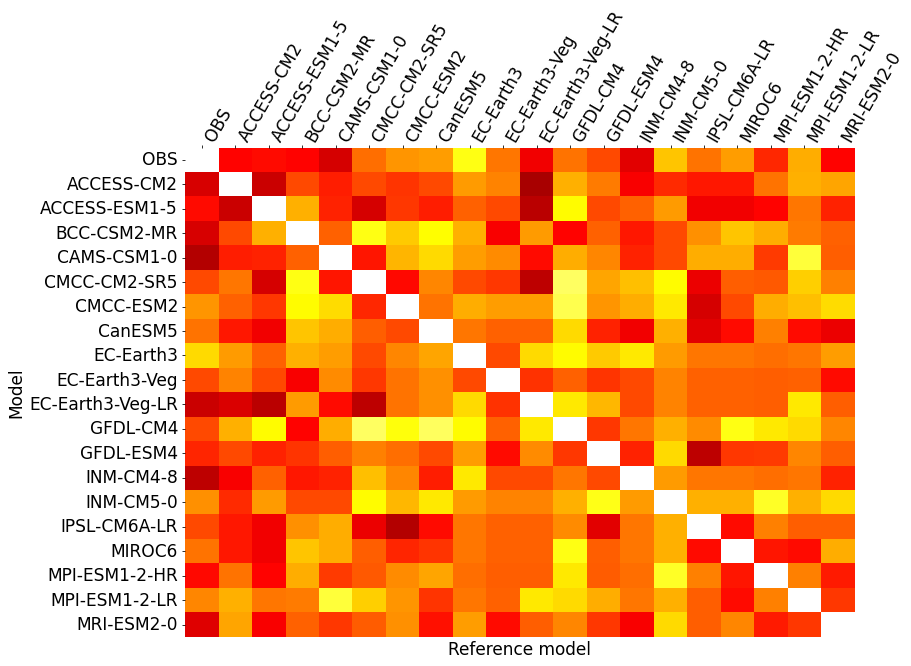

In [5]:
fs = 17
cmap = plt.cm.get_cmap('hot_r')
fig = plt.figure(figsize=(12,9))
g = sns.heatmap(df_globalavg_pivot, cmap=cmap, annot=False, vmin = 0.3, vmax = 1, cbar=False)
g.xaxis.set_ticks_position("top")
g.set_xlabel('Reference model',fontsize=fs)
g.set_ylabel('Model',fontsize=fs)
g.set_xticklabels(g.get_xticklabels(), rotation="60",verticalalignment= 'baseline',horizontalalignment= "left", fontsize = fs)
g.set_yticklabels(g.get_yticklabels(), fontsize = fs)
#plt.savefig (base_folder + 'f1_score/'+ today.strftime('%d%m%Y')+ '/historical_1979-2019_'+ masking+ '_heatmap.png', dpi =120, bbox_inches = 'tight')